In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
pd.options.display.float_format='{:.3f}'.format

In [2]:
mathData=pd.read_csv('student-mat.csv',sep=';')
portuguessData=pd.read_csv('student-por.csv',sep=';')

In [3]:
print(mathData.shape)
mathData.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
print(portuguessData.shape)
portuguessData.head()

(649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
# concat the table based on the rows, G1-period1 Score, G2-period2 score, G3 final Score
dataSet=pd.concat([mathData,portuguessData])

In [6]:
print(dataSet.shape)
dataSet.head()

(1044, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
dataSet.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.0,1044.0,1044.0,1044.0,1044.0,1044.0,1044.0,1044.0,1044.0,1044.0,1044.0,1044.0,1044.0,1044.0,1044.0,1044.0
mean,16.7,2.6,2.4,1.5,2.0,0.3,3.9,3.2,3.2,1.5,2.3,3.5,4.4,11.2,11.2,11.3
std,1.2,1.1,1.1,0.7,0.8,0.7,0.9,1.0,1.2,0.9,1.3,1.4,6.2,3.0,3.3,3.9
min,15.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
25%,16.0,2.0,1.0,1.0,1.0,0.0,4.0,3.0,2.0,1.0,1.0,3.0,0.0,9.0,9.0,10.0
50%,17.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,2.0,11.0,11.0,11.0
75%,18.0,4.0,3.0,2.0,2.0,0.0,5.0,4.0,4.0,2.0,3.0,5.0,6.0,13.0,13.0,14.0
max,22.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,75.0,19.0,19.0,20.0


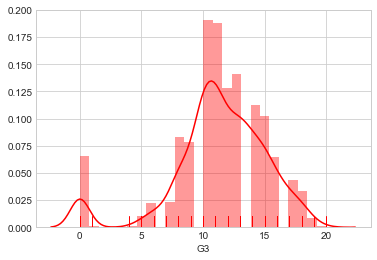

In [8]:
sns.distplot(dataSet.G3,rug='true',color='r')
plt.show()

In [9]:
# add a column as final_grade to classify the different categories of the score based on the final_score
# 15-20 good; 10-15 fair; 0-10 poor;
dataSet.loc[(dataSet.G3>=15)&(dataSet.G3<=20),'final_grade']='good'
dataSet.loc[(dataSet.G3>=10)&(dataSet.G3<15),'final_grade']='fair'
dataSet.loc[dataSet.G3<10,'final_grade']='poor'

In [10]:
dataSet.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair


In [11]:
dataSet.isnull().any()

school         False
sex            False
age            False
address        False
famsize        False
Pstatus        False
Medu           False
Fedu           False
Mjob           False
Fjob           False
reason         False
guardian       False
traveltime     False
studytime      False
failures       False
schoolsup      False
famsup         False
paid           False
activities     False
nursery        False
higher         False
internet       False
romantic       False
famrel         False
freetime       False
goout          False
Dalc           False
Walc           False
health         False
absences       False
G1             False
G2             False
G3             False
final_grade    False
dtype: bool

## Final Grade Distribution

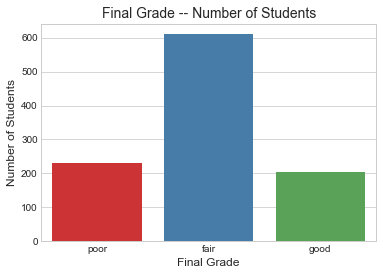

In [12]:
sns.countplot(dataSet.final_grade,order=['poor','fair','good'],palette='Set1')
plt.title('Final Grade -- Number of Students',fontsize=14)
plt.ylabel('Number of Students',fontsize=12)
plt.xlabel('Final Grade',fontsize=12)
plt.show()

## Correlation Heatmap

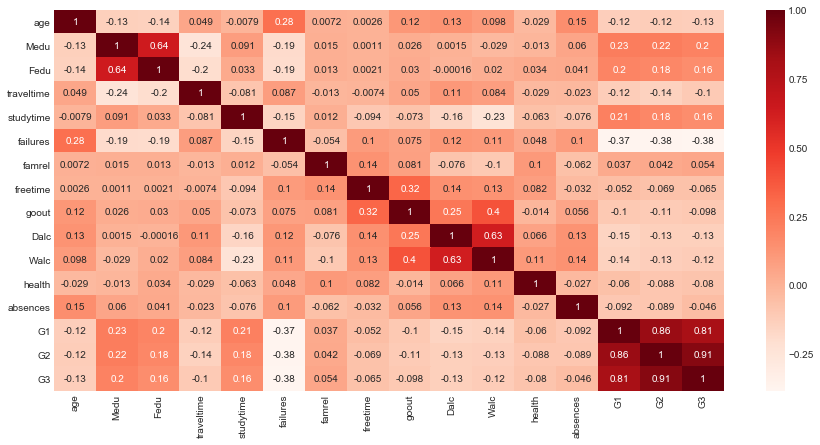

In [13]:
corrMatrix=dataSet.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corrMatrix,annot=True,cmap='Reds')
plt.show()

In [14]:
corrMatrix.G3.sort_values(ascending=False)

G3            1.0
G2            0.9
G1            0.8
Medu          0.2
studytime     0.2
Fedu          0.2
famrel        0.1
absences     -0.0
freetime     -0.1
health       -0.1
goout        -0.1
traveltime   -0.1
Walc         -0.1
age          -0.1
Dalc         -0.1
failures     -0.4
Name: G3, dtype: float64

## Final Grade by Romantic Status

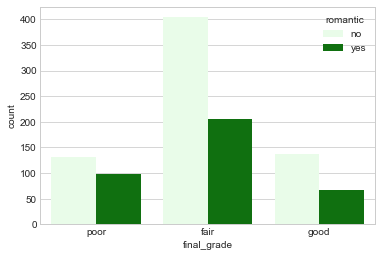

In [51]:
sns.countplot(x='final_grade',hue='romantic',data=dataSet,color='g')
plt.show()

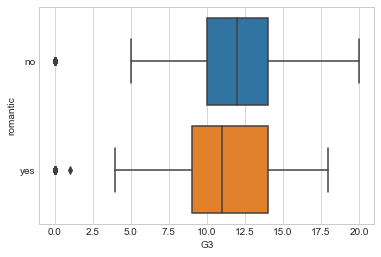

In [16]:
sns.boxplot(x='G3',y='romantic',data=dataSet)
plt.show()

## crosstab Example

In [17]:
a=np.array(['foo', 'foo',  'foo', 'foo', 'bar', 'bar',  'bar',  'bar', 'foo',  'foo',  'foo'],dtype=object)
b=np.array(['one', 'one',  'one', 'two', 'one', 'one',  'one',  'two', 'two',  'two',  'one'],dtype=object)
c=np.array(['dull','dull','shiny','dull','dull','shiny','shiny','dull','shiny','shiny','shiny'],dtype=object)

In [18]:
pd.crosstab(a,[b,c],rownames=['a'],colnames=['b','c'])

b    one        two      
c   dull shiny dull shiny
a                        
bar    1     2    1     0
foo    2     2    1     2

## Final Grade By Romantic Status

In [42]:
perc=(lambda col:col/col.sum())
index=['poor','fair','good']
romance_tab1=pd.crosstab(index=dataSet.final_grade,columns=dataSet.romantic)
romance_tab=np.log(romance_tab1)
romance_perc=romance_tab.apply(perc).reindex(index)

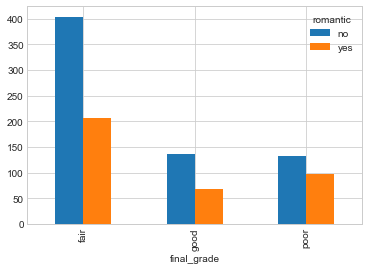

In [59]:
romance_tab1.plot.bar()
plt.show()

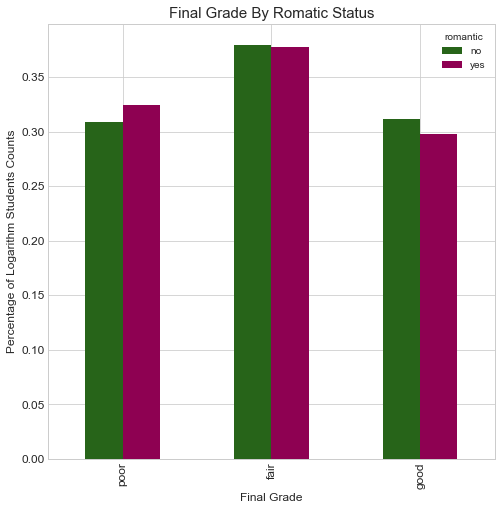

In [54]:
romance_perc.plot.bar(colormap='PiYG_r',fontsize=12,figsize=(8,8))
plt.title('Final Grade By Romatic Status',fontsize=15)
plt.ylabel('Percentage of Logarithm Students Counts',fontsize=12)
plt.xlabel('Final Grade',fontsize=12)
plt.show()

# Hypothesis Testing Confirmed,Romantic Status has a Significant Correlation with the final grade

In [62]:
#chi-square test result-significant!
import statsmodels.api as sm
romance_table=sm.stats.Table(romance_tab1)
romance_rslt=romance_table.test_nominal_association()
romance_rslt.pvalue

0.038810128743959726

In [63]:
dataSet.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'final_grade'],
      dtype='object')

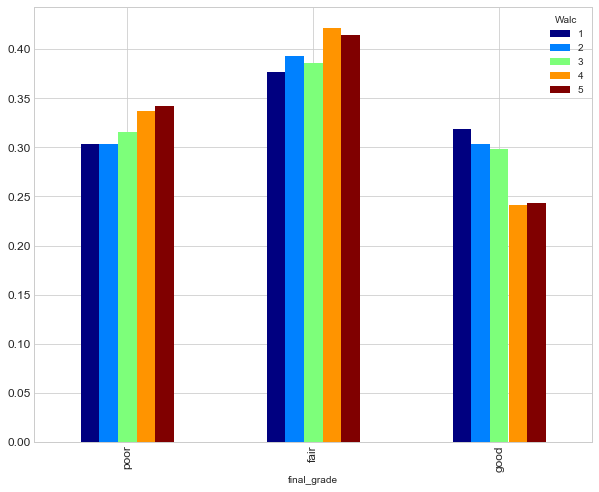

In [84]:
## Final grade vs weekend alcohol usage
alh_tab1=pd.crosstab(index=dataSet.final_grade,columns=dataSet.Walc)
alh_tab=np.log(alh_tab1)
alh_perc=alh_tab.apply(perc).reindex(index)

alh_perc.plot.bar(colormap=plt.get_cmap('jet'),figsize=(10,8),fontsize=12)
plt.show()

## Hypothesis Testing confirmed, weekend alcohol consumption has a significant correlation with final grade

In [95]:
import statsmodels.api as sm
alc_table=sm.stats.Table(alh_tab1)
alc_rslt=alc_table.test_nominal_association()
alc_rslt.pvalue

0.0075922940563682983

In [116]:
# kernel density estimate
good=dataSet.loc[dataSet.final_grade=='good','Walc'].values
poor=dataSet.loc[dataSet.final_grade=='poor','Walc'].values

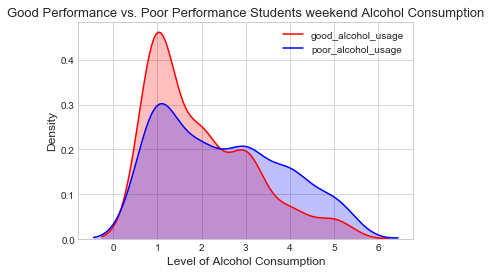

In [122]:
p1=sns.kdeplot(good,shade=True,color='r',label='good_alcohol_usage')
p1=sns.kdeplot(poor,shade=True,color='b',label='poor_alcohol_usage')
plt.title('Good Performance vs. Poor Performance Students weekend Alcohol Consumption',fontsize=13)
plt.ylabel('Density',fontsize=12)
plt.xlabel('Level of Alcohol Consumption',fontsize=12)
plt.legend()
plt.show()

## Does your educational level influence your future kids

In [132]:
good_Fedu=dataSet.loc[dataSet.final_grade=='good','Fedu'].values
poor_Fedu=dataSet.loc[dataSet.final_grade=='poor','Fedu'].values

good_Medu=dataSet.loc[dataSet.final_grade=='good','Medu'].values
poor_Medu=dataSet.loc[dataSet.final_grade=='poor','Medu'].values

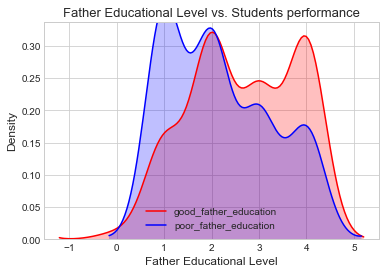

In [139]:
p1=sns.kdeplot(good_Fedu,shade=True,color='r',label='good_father_education')
p1=sns.kdeplot(poor_Fedu,shade=True,color='b',label='poor_father_education')
plt.title('Father Educational Level vs. Students performance',fontsize=13)
plt.ylabel('Density',fontsize=12)
plt.legend()
plt.xlabel('Father Educational Level',fontsize=12)
plt.show()

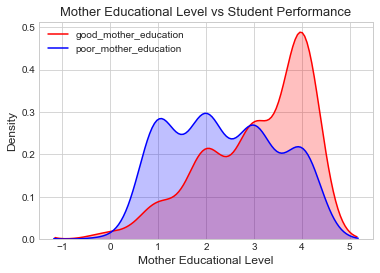

In [142]:
p2=sns.kdeplot(good_Medu,shade=True,color='r',label='good_mother_education')
p2=sns.kdeplot(poor_Medu,shade=True,color='b',label='poor_mother_education')
plt.title('Mother Educational Level vs Student Performance',fontsize=13)
plt.ylabel('Density',fontsize=12)
plt.xlabel('Mother Educational Level',fontsize=12)
plt.show()

## OLS tells that parent's educational level has a positive correlation with the student's final score. Comparatively,mothers' educational level has bigger influence than that of father's

In [152]:
import statsmodels.api as sm
X_edu=dataSet[['Medu','Fedu']]
y_edu=dataSet.G3

edu=sm.OLS(y_edu,X_edu)
result=edu.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     2287.
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        21:21:54   Log-Likelihood:                -3194.8
No. Observations:                1044   AIC:                             6394.
Df Residuals:                    1042   BIC:                             6403.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Medu           2.4078      0.166     14.527      0.000       2.083       2.733
Fedu           1.5746      0.179      8.806      0.000       1.224       1.926
==============================================================================
Omnibus:                       35.858   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.773
Skew:                          -0.427   Prob(JB):                     2.31e-09
Kurtosis:                       3.430   Cond. No.                         5.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Final Grade By the Desire of Going to the College

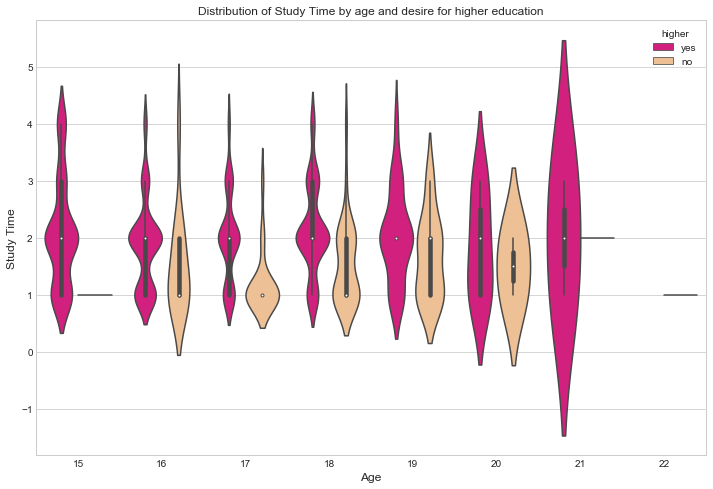

In [156]:
# Desire for higher education and study time by age
plt.figure(figsize=(12,8))
sns.violinplot(x='age',y='studytime',hue='higher',data=dataSet,palette='Accent_r',ylim=(1,6))
plt.title('Distribution of Study Time by age and desire for higher education',fontsize=12)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Study Time',fontsize=12)
plt.show()

In [159]:
higher_edu=pd.crosstab(index=dataSet.final_grade,columns=dataSet.higher)
higher_edu_perc=higher_edu.apply(perc).reindex(index)
higher_edu_perc

higher,no,yes
final_grade,,
poor,0.517,0.193
fair,0.483,0.594
good,0.000,0.214


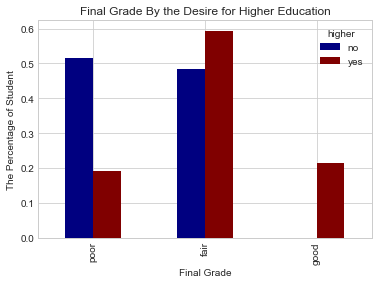

In [165]:
higher_edu_perc.plot.bar(colormap=plt.get_cmap('jet'))
plt.title('Final Grade By the Desire for Higher Education')
plt.xlabel('Final Grade')
plt.ylabel('The Percentage of Student')
plt.show()

In [167]:
import statsmodels.api as sm
higherEdu_table=sm.stats.Table(higher_edu)
higher_Edu_rslt=higherEdu_table.test_nominal_association()
higher_Edu_rslt.pvalue

1.7852386235972517e-13

## The relationship between the final grade and the living places

In [170]:
dataSet['address']=dataSet.address.replace({'U':'Urban','R':'Rural'})

In [174]:
addr_tab1=pd.crosstab(index=dataSet.final_grade,columns=dataSet.address)
addr_tab=np.log(addr_tab1)
addr_perc=addr_tab.apply(perc).reindex(index)
addr_perc

address,Rural,Urban
final_grade,,
poor,0.330,0.310
fair,0.388,0.376
good,0.282,0.314


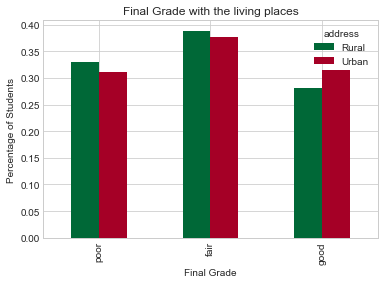

In [181]:
addr_perc.plot.bar(colormap='RdYlGn_r')
plt.title('Final Grade with the living places')
plt.ylabel('Percentage of Students')
plt.xlabel('Final Grade')
plt.show()

## Hypothesis show the significance of living place with the student's final result

In [182]:
table_addr=sm.stats.Table(addr_tab1)
table_rslt=table_addr.test_nominal_association()
table_rslt.pvalue

0.0076089105178736016

# Classification

In [184]:
data=dataSet.copy()

In [213]:
y=data.final_grade
X=data.drop(['final_grade','G3'],axis=1)

In [214]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [215]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [216]:
X_train.shape

(730, 32)

In [217]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

### Decision Tree Classification

In [227]:
# find the optimal # of the minimum samples leaf
from sklearn.tree import DecisionTreeClassifier
msl=[]
for i in range(1,58):
    tree=DecisionTreeClassifier(min_samples_leaf=i)
    t=tree.fit(X_train,y_train)
    ts=t.score(X_test,y_test)
    msl.append(ts)
msl=pd.Series(msl)
msl.where(msl==msl.max()).dropna()

27   0.895
28   0.895
29   0.895
30   0.895
31   0.895
32   0.895
33   0.895
34   0.895
35   0.895
36   0.895
37   0.895
38   0.895
dtype: float64

In [224]:
tree=DecisionTreeClassifier(min_samples_leaf=17)
t=tree.fit(X_train,y_train)
print('Decision Tree Model Score:',t.score(X_train,y_train),"\nCross Validation Score:",t.score(X_test,y_test))

Decision Tree Model Score: 0.893150684932 
Cross Validation Score: 0.869426751592


In [228]:
tree=DecisionTreeClassifier(min_samples_leaf=27)
t=tree.fit(X_train,y_train)
print('Decision Tree Model Score:',t.score(X_train,y_train),"\nCross Validation Score:",t.score(X_test,y_test))

Decision Tree Model Score: 0.883561643836 
Cross Validation Score: 0.888535031847


### RandomForest Classifier

In [238]:
# find a good number of estimators
from sklearn.ensemble import RandomForestClassifier
ns=[]
for i in range(1,58):
    rdf=RandomForestClassifier(n_estimators=i)
    rdf.fit(X_train,y_train)
    fs=rdf.score(X_test,y_test)
    ns.append(fs)
ns=pd.Series(ns)
ns.where(ns==ns.max()).dropna()

45   0.895
dtype: float64

In [241]:
# find a good number of min_samples_leaf
from sklearn.ensemble import RandomForestClassifier
msl=[]
for i in range(1,58):
    tree=RandomForestClassifier(n_estimators=45,min_samples_leaf=i)
    f=tree.fit(X_train,y_train)
    fs=f.score(X_test,y_test)
    msl.append(fs)
    
msl=pd.Series(msl)
msl.where(msl==msl.max()).dropna()

1   0.882
4   0.882
dtype: float64

In [242]:
forest=RandomForestClassifier(n_estimators=45,min_samples_leaf=1)
f=forest.fit(X_train,y_train)

In [243]:
print('Random Forest Model Score:',f.score(X_train,y_train),'\nCross Validation Score:',f.score(X_test,y_test))

Random Forest Model Score: 1.0 
Cross Validation Score: 0.869426751592


### Support Vector Machine

In [244]:
from sklearn.svm import SVC
svc=SVC()
svcClf=svc.fit(X_train,y_train)
print('SVC Model Score:',svcClf.score(X_train,y_train),'\nCross Validation Score:',svcClf.score(X_test,y_test))

SVC Model Score: 0.930136986301 
Cross Validation Score: 0.904458598726


### Logistic Regression

In [263]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='multinomial',solver='newton-cg',fit_intercept=True)

In [264]:
from sklearn.feature_selection import SelectKBest,chi2
ks=[]
for i in range(1,58):
    sk=SelectKBest(chi2,k=i)
    X_new=sk.fit_transform(X_train,y_train)
    X_new_test=sk.fit_transform(X_test,y_test)
    l=lr.fit(X_new,y_train)
    ls=l.score(X_new_test,y_test)
    ks.append(ls)
    
ks=pd.Series(ks)
ks=ks.reindex(list(range(1,58)))

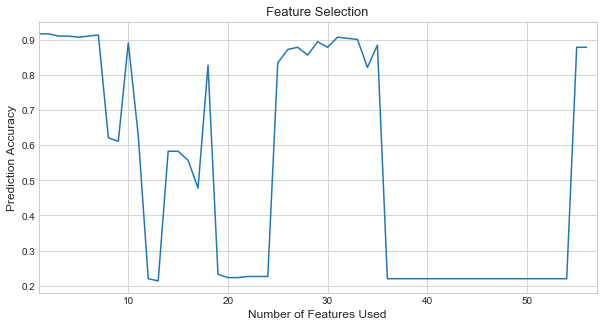

In [265]:
plt.figure(figsize=(10,5))
ks.plot.line()
plt.title('Feature Selection',fontsize=13)
plt.xlabel('Number of Features Used',fontsize=12)
plt.ylabel('Prediction Accuracy',fontsize=12)
plt.show()

In [266]:
ks.where(ks==ks.max()).dropna()

1   0.917
2   0.917
dtype: float64

In [277]:
sk=SelectKBest(chi2,k=8)
X_new=sk.fit_transform(X_train,y_train)
X_new_test=sk.fit_transform(X_test,y_test)
lr=lr.fit(X_new,y_train)
print('Logistic Regression Model Score:',lr.score(X_new,y_train),'\nCross Validation Score:',lr.score(X_new_test,y_test))

Logistic Regression Model Score: 0.880821917808 
Cross Validation Score: 0.914012738854


### AdaBoost Classification

In [280]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=2)
adaClf=ada.fit(X_train,y_train)
print('AdaBoost Model Score:',adaclf.score(X_train,y_train),'\nCross Validation Score:',adaClf.score(X_test,y_test))

AdaBoost Model Score: 0.735616438356 
Cross Validation Score: 0.745222929936


### Stochastic Gradient Descent Classification

In [281]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgdClf=sgd.fit(X_train,y_train)
print('Stochastic Gradient Descent Classification Score:',sgdClf.score(X_train,y_train),'\nCross Validation Score:',sgdClf.score(X_test,y_test
                                                                                                                            ))

Stochastic Gradient Descent Classification Score: 0.616438356164 
Cross Validation Score: 0.563694267516


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
